## Principais pacotes utilizados

In [47]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [48]:
df_left = pd.read_csv('df_left.csv')

In [49]:
df_left['Testing_Cost'] = df_left["Testing_Cost"].str.replace(',','.')
df_left['Testing_Cost'] = df_left['Testing_Cost'].astype(float)
df_left['Date of service'] = pd.to_datetime(df_left['Date of service'])


In [50]:
df_left=df_left[['Lab_Id','Date of service','Testing_Cost']]

In [51]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Lab_Id           object        
 1   Date of service  datetime64[ns]
 2   Testing_Cost     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 53.9+ MB


In [52]:
del df_left['Lab_Id']
df_left.set_index(['Date of service'])
_prophet_df = df_left.rename(columns={'Date of service':'ds', 'Testing_Cost':'y'})


In [53]:
_prophet_df

,ds,y
0,2019-01-07,9.0
1,2019-01-07,13.0
2,2019-01-07,49.0
3,2019-01-07,11.0
4,2019-01-07,10.0
...,...,...
2355236,2021-02-12,10.0
2355237,2021-02-12,10.0
2355238,2021-02-12,9.0
2355239,2021-02-12,13.0


## Análise Forecast geral

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

m = Prophet()
m.fit(_prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -1832.65
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99   9.60057e+06   0.000450675        300954           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199   9.60095e+06   3.17044e-05       54874.6           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257   9.60104e+06   5.34538e-06       18280.8           1           1      308   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below

In [55]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [72]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,56.632306,-68.648165,184.096085,56.632306,56.632306,-0.583414,-0.583414,-0.583414,1.799334,1.799334,1.799334,-2.382748,-2.382748,-2.382748,0.0,0.0,0.0,56.048892
1,2019-01-02,56.275038,-80.773415,174.861188,56.275038,56.275038,-3.549239,-3.549239,-3.549239,-0.820923,-0.820923,-0.820923,-2.728316,-2.728316,-2.728316,0.0,0.0,0.0,52.725799
2,2019-01-03,55.917771,-68.316246,171.189617,55.917771,55.917771,-3.808763,-3.808763,-3.808763,-0.767542,-0.767542,-0.767542,-3.041221,-3.041221,-3.041221,0.0,0.0,0.0,52.109008
3,2019-01-04,55.560503,-74.463593,175.225332,55.560503,55.560503,-3.211975,-3.211975,-3.211975,0.104053,0.104053,0.104053,-3.316027,-3.316027,-3.316027,0.0,0.0,0.0,52.348528
4,2019-01-05,55.203235,-75.715659,168.422878,55.203235,55.203235,-4.855775,-4.855775,-4.855775,-1.307701,-1.307701,-1.307701,-3.548074,-3.548074,-3.548074,0.0,0.0,0.0,50.347461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2022-02-08,40.405956,-107.560604,179.019542,-29.377907,109.145881,2.471655,2.471655,2.471655,1.799334,1.799334,1.799334,0.672321,0.672321,0.672321,0.0,0.0,0.0,42.877612
1131,2022-02-09,40.370720,-110.887341,183.456233,-29.664361,109.514117,-0.233567,-0.233567,-0.233567,-0.820923,-0.820923,-0.820923,0.587356,0.587356,0.587356,0.0,0.0,0.0,40.137153
1132,2022-02-10,40.335484,-100.982912,191.487810,-29.948317,109.882352,-0.258252,-0.258252,-0.258252,-0.767542,-0.767542,-0.767542,0.509289,0.509289,0.509289,0.0,0.0,0.0,40.077232
1133,2022-02-11,40.300248,-97.234012,189.363150,-30.227807,110.250588,0.547497,0.547497,0.547497,0.104053,0.104053,0.104053,0.443445,0.443445,0.443445,0.0,0.0,0.0,40.847745


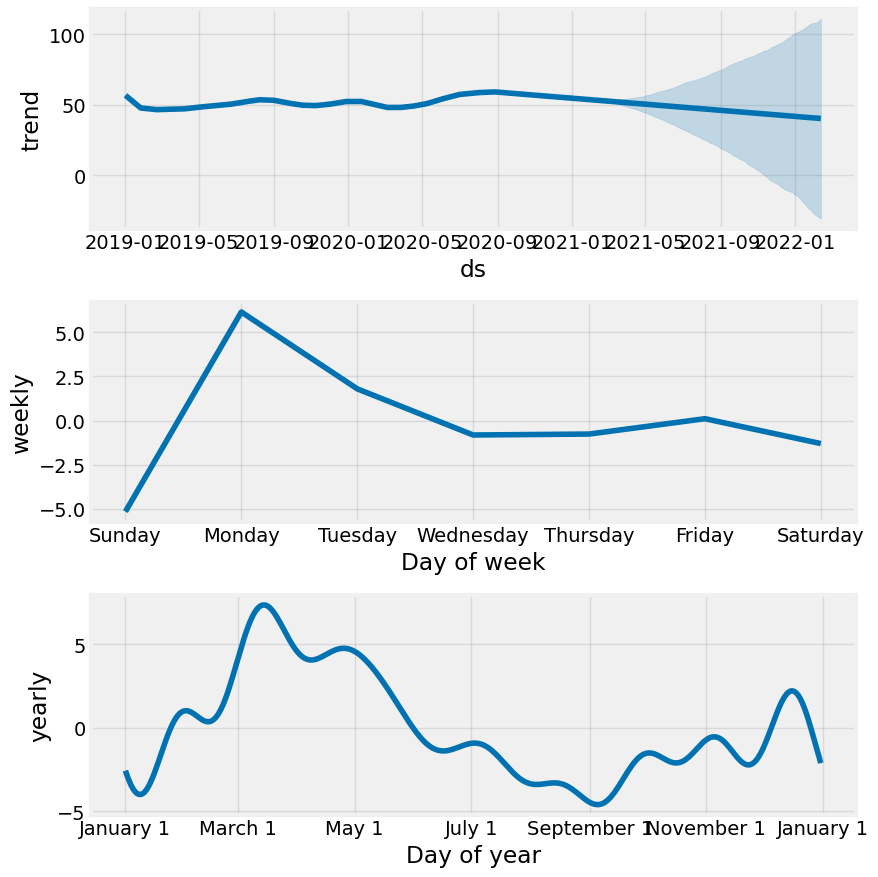

In [57]:
figure3 = m.plot_components(forecast)

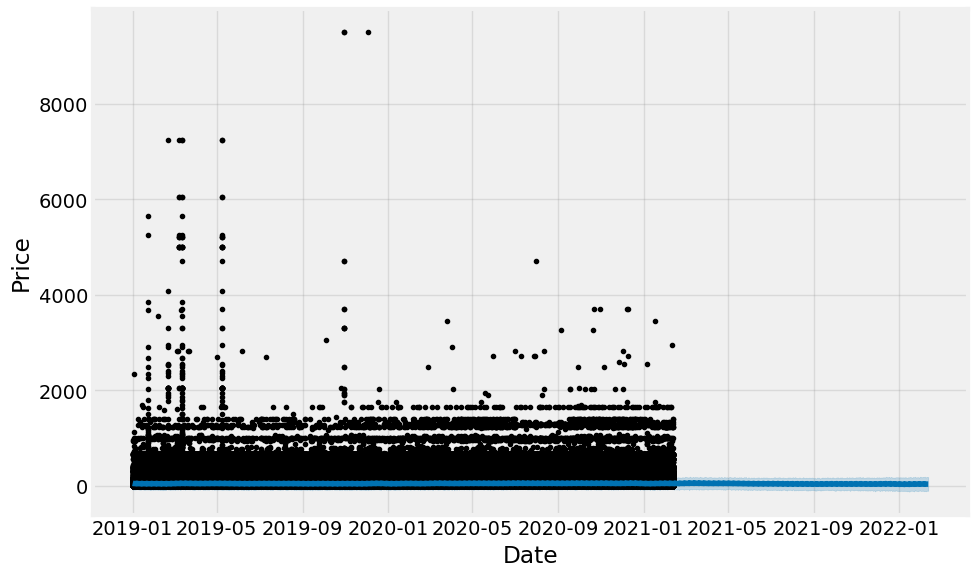

In [58]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

In [59]:
df_left2 = pd.read_csv('df_left.csv')

In [60]:
df_left2['Testing_Cost'] = df_left2["Testing_Cost"].str.replace(',','.')
df_left2['Testing_Cost'] = df_left2['Testing_Cost'].astype(float)
df_left2['Date of service'] = pd.to_datetime(df_left2['Date of service'])


In [61]:
df_left2=df_left2[['Lab_Id','Date of service','Testing_Cost']]

In [62]:
df_left2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Lab_Id           object        
 1   Date of service  datetime64[ns]
 2   Testing_Cost     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 53.9+ MB


## Análise Forecast Específico

In [63]:
_df_sampleL058 = df_left2[df_left2['Lab_Id']=='L058']

In [64]:
_df_sampleL058 = _df_sampleL058.sort_values("Date of service")

In [65]:
_df_sampleL058.columns

Index(['Lab_Id', 'Date of service', 'Testing_Cost'], dtype='object')

In [66]:
del _df_sampleL058['Lab_Id']
_df_sampleL058 = _df_sampleL058.rename(columns={'Date of service':'ds', 'Testing_Cost':'y'})


In [67]:
m2 = Prophet()
m2.fit(_df_sampleL058)
# Forcasting into the future
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -37.2029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89        104009   6.88628e-06       189.575   7.867e-08       0.001      155  LS failed, Hessian reset 
      99        104009   0.000378164       373.435           1           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        104009   0.000288258       751.944      0.6005      0.6005      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        104009   8.23497e-05       182.294           1           1      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312        104009   4.32492e-06       91.8398      0.3164           1      425   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [68]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,28.196753,-10.504931,71.972531,28.196753,28.196753,1.944849,1.944849,1.944849,3.292679,3.292679,3.292679,-1.347830,-1.347830,-1.347830,0.0,0.0,0.0,30.141601
1,2019-01-03,28.201923,-17.100468,68.411749,28.201923,28.201923,-1.041714,-1.041714,-1.041714,0.459230,0.459230,0.459230,-1.500944,-1.500944,-1.500944,0.0,0.0,0.0,27.160209
2,2019-01-04,28.207093,-14.290897,72.689652,28.207093,28.207093,-0.236243,-0.236243,-0.236243,1.394850,1.394850,1.394850,-1.631092,-1.631092,-1.631092,0.0,0.0,0.0,27.970850
3,2019-01-05,28.212263,-10.904995,71.982433,28.212263,28.212263,0.136513,0.136513,0.136513,1.872804,1.872804,1.872804,-1.736290,-1.736290,-1.736290,0.0,0.0,0.0,28.348776
4,2019-01-06,28.217433,-17.257250,71.172054,28.217433,28.217433,-2.401335,-2.401335,-2.401335,-0.586255,-0.586255,-0.586255,-1.815080,-1.815080,-1.815080,0.0,0.0,0.0,25.816098


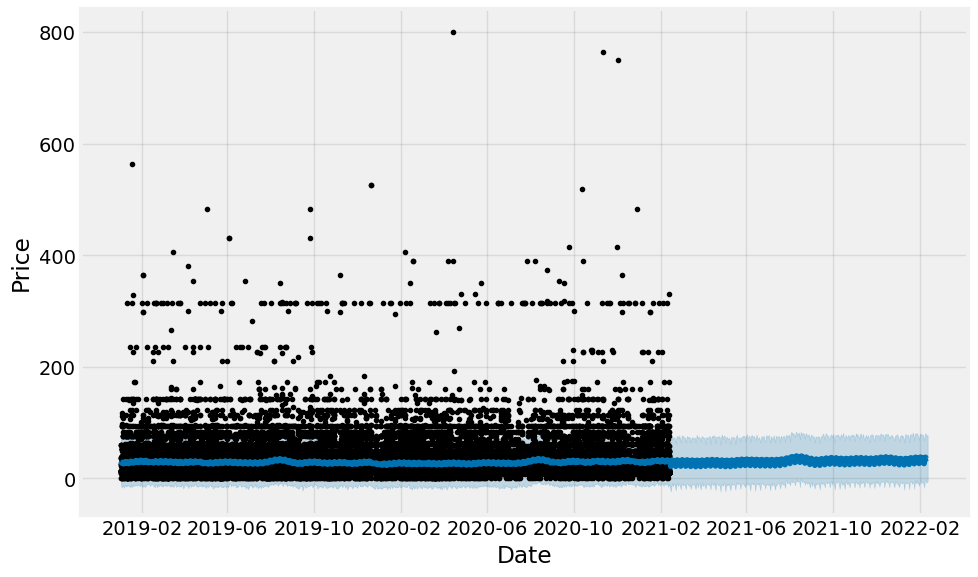

In [69]:
figure = m2.plot(forecast2, xlabel='Date', ylabel='Price')

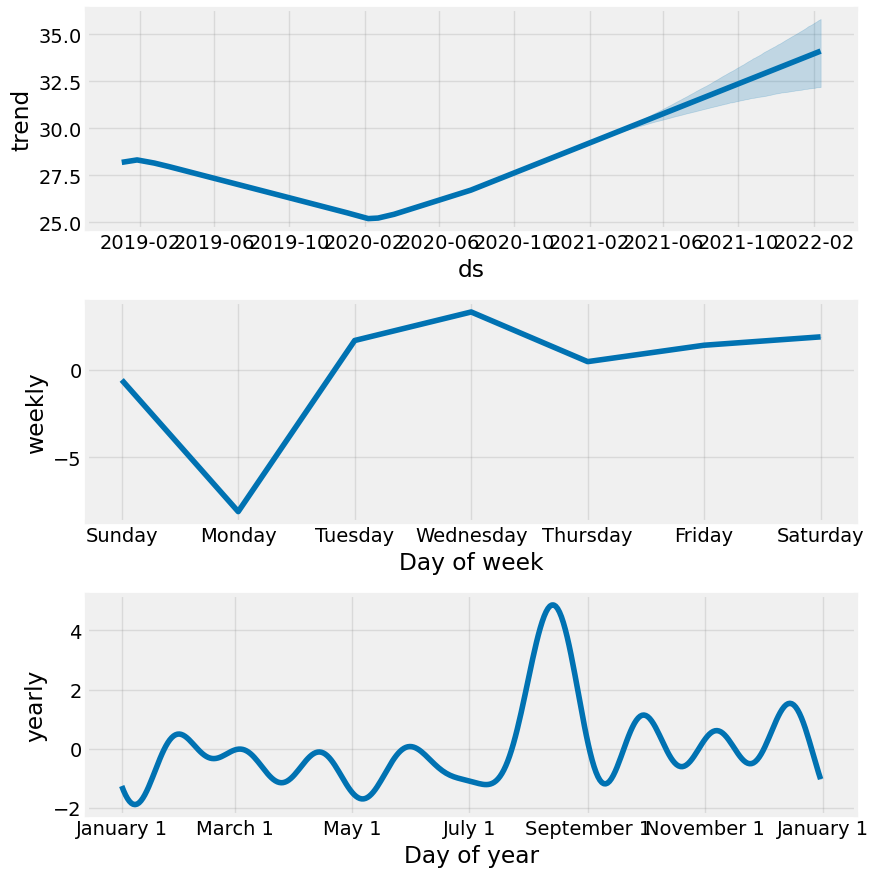

In [70]:
figure3 = m2.plot_components(forecast2)

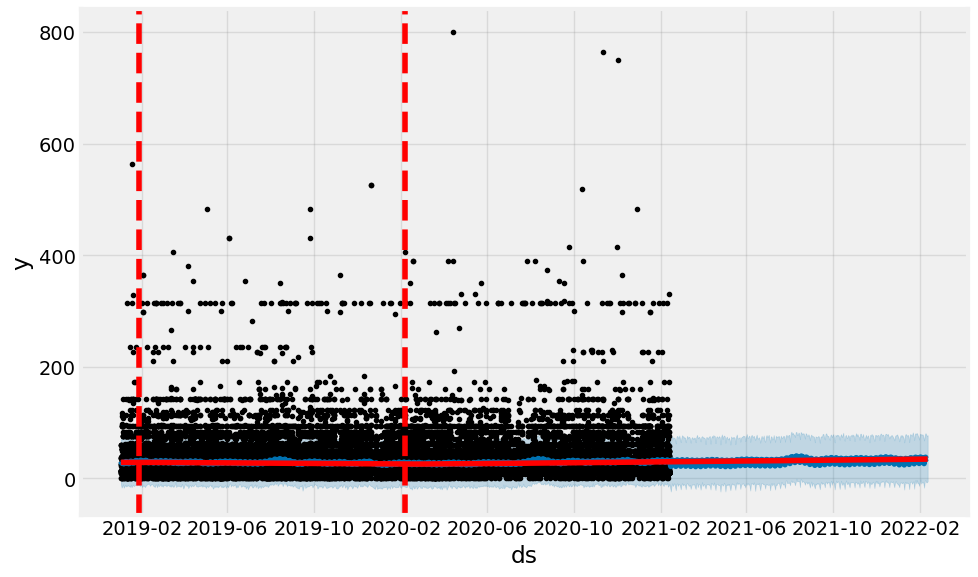

In [71]:
# Python
from prophet.plot import add_changepoints_to_plot
fig = m2.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), m2, forecast2)
